# 가위바위보 분류기 만들기

### 1. 데이터를 준비하자
 - 구글의 teachable machine 사이트 -> Get Started -> Image Project
[teachable machine](https://teachablemachine.withgoogle.com/)


#### 디렉토리 만들기
![image.png](attachment:image.png)

##### 토막 리눅스 사용법
- mkdir -p: mkdir 사용해 하위 디렉토리 생성할 때 차례대로 만들지 않고 중간 디렉토리 없이 바로 그 다음 하위 디렉토리 만들게되면 "디렉토리를 생성할 수 없습니다." 메세지가 나옴
- -p 옵션을 주어 생성하게 되면 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리 생성하게 됨

#### 이미지 업로드
![image.png](attachment:image.png)

#### 클라우드 이미지 압축 해제
![image.png](attachment:image.png)

### 2. 데이터 불러오기 + Resize 하기
- 숫자 손글씨의 경우, 이미지 크기가 28x28이었음
- 가위, 바위, 보 이미지도 28x28로 만들어야 함
- PIL 라이브러리 사용

In [63]:
# 필요 라이브러리  import
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [64]:
# 현재 디렉토리 확인
!pwd

/aiffel/aiffel/Exploration


In [65]:
import os
import shutil

base_dir = os.getenv("HOME") + "/data_all_users"
members = ['경은', '수완', '승민', '사공', '은서', '재성', '정식', '준일', '태경', '호성']
# members = os.listdir(base_dir)
categories = ['paper', 'scissor', 'rock']
base_dst = os.getenv("HOME") + "/aiffel/data"

for member in members:
    for category in categories:
        path = os.path.join(base_dir, member, category)
        for image in os.listdir(path):
            image_rename = member + '_' + image
            image_path_src = os.path.join(base_dir, member, category, image)
            image_path_dst = os.path.join(base_dst, category, image_rename)
            shutil.copyfile(image_path_src, image_path_dst)


print(f"총 {len(members)}명의 데이터가 모였습니다~~")

for category in categories:
    print(f"{category}에 {len(os.listdir(base_dst +'/' + category))}개 ")

총 10명의 데이터가 모였습니다~~
paper에 1028개 
scissor에 1028개 
rock에 1033개 


In [66]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/data/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1027  images to be resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027

In [67]:
# 이미지 사이즈 변경(224 * 224 -> 28 * 28)
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") +  "/aiffel/data/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1032  images to be resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032  images resized.
1032

In [68]:
# 이미지 사이즈 변경(224 * 224 -> 28 * 28)
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일 읽어들여서
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")
    
# 파일마다 모두 28 * 28 사이즈로 바꾸어 저장
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        print(len(images), " images resized.")
        
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일 읽어들여서
image_dir_path = os.getenv("HOME") +  "/aiffel/data/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1027  images to be resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027  images resized.
1027

### 3. Data load하기

In [69]:
import numpy as np

def load_data(img_path, number_of_data=3386):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/data"
(x_train, y_train)=load_data(image_dir_path, 3386)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3086 입니다.
x_train shape: (3386, 28, 28, 3)
y_train shape: (3386,)


In [70]:
x_train.shape, y_train.shape

((3386, 28, 28, 3), (3386,))

라벨:  0


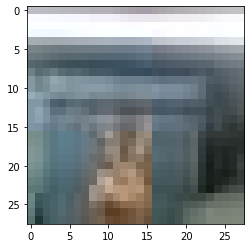

In [71]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 4. 딥러닝 네트워크 설계하기

In [72]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.random.set_seed(0)

# 상수 지정
N_CHANNEL_1 = 32
N_CHANNEL_2 = 64
N_DENSE = 64
N_TRAIN_EPOCH = 20

model = keras.models.Sequential()
# 얼마나 다양한 이미지 특징 살펴볼 것인가 - 16개의 이미지 특징
model.add(keras.layers.Conv2D(N_CHANNEL_1, (3,3), activation = 'relu', input_shape = (28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
# # 얼마나 다양한 이미지 특징 살펴볼 것인가 - 32개의 이미지 특징
model.add(keras.layers.Conv2D(N_CHANNEL_2, (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

#분류기 알고리즘을 얼마나 복잡하게 할 것인가
model.add(keras.layers.Dense(N_DENSE, activation = 'relu'))

# 출력층 - 최종 분류기의 class 수 - 3(가위, 바위, 보)
model.add(keras.layers.Dense(3, activation = 'softmax'))

# 딥러닝 네트워크 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

### 5.딥러닝 네트워크 학습시키기

In [73]:
# 모델 구조 이미지로 보기 - 패키지 설치
!pip install pydot pydotplus graphviz

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


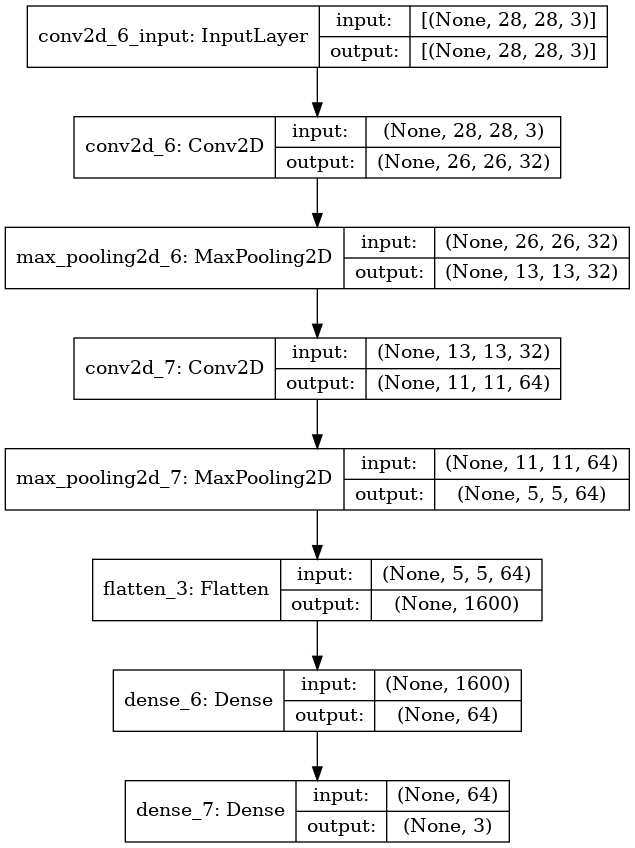

In [74]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'model.png', show_shapes = True)

In [75]:
# 컴파일 단계
# 구축된 모델에 추가 설정(어떻게 학습할지에 대한 설정)
# 손실함수
# Optimizer(최적화 함수)
# 평가지표
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [76]:
# 모델 훈련

model.fit(x_train_norm, y_train, epochs = N_TRAIN_EPOCH)

Epoch 1/20
106/106 [==============================] - 1s 4ms/step - loss: 1.0452 - accuracy: 0.4252
Epoch 2/20
106/106 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.6929
Epoch 3/20
106/106 [==============================] - 0s 4ms/step - loss: 0.3635 - accuracy: 0.8701
Epoch 4/20
106/106 [==============================] - 0s 4ms/step - loss: 0.2227 - accuracy: 0.9318
Epoch 5/20
106/106 [==============================] - 0s 4ms/step - loss: 0.1082 - accuracy: 0.9796
Epoch 6/20
106/106 [==============================] - 0s 4ms/step - loss: 0.0952 - accuracy: 0.9750
Epoch 7/20
106/106 [==============================] - 0s 4ms/step - loss: 0.0469 - accuracy: 0.9901
Epoch 8/20
106/106 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.9967
Epoch 9/20
106/106 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9951
Epoch 10/20
106/106 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9979

### 6. 모델 성능 테스트

In [89]:
test_img_path = os.getenv("HOME") + "/aiffel/data/test/지윤/rock"
resize_images(test_img_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  im

In [90]:
test_img_path = os.getenv("HOME") + "/aiffel/data/test/지윤/scissor"
resize_images(test_img_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  im

In [91]:
test_img_path = os.getenv("HOME") + "/aiffel/data/test/지윤/paper"
resize_images(test_img_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  images resized.
100  im

In [96]:
# 데이터 load하기
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/data/test/지윤"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


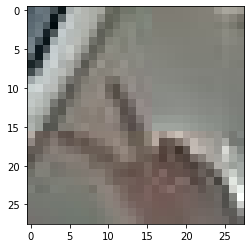

In [97]:
# 테스트 데이터 확인
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [98]:
# 모델 컴파일
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [99]:
# 모델 훈련

model.fit(x_test_norm, y_test, epochs = N_TRAIN_EPOCH)

Epoch 1/20
10/10 [==============================] - 0s 4ms/step - loss: 5.5203 - accuracy: 0.4501
Epoch 2/20
10/10 [==============================] - 0s 4ms/step - loss: 0.2671 - accuracy: 0.8795
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0901 - accuracy: 0.9606
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9898
Epoch 5/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0103 - accuracy: 1.0000
Epoch 8/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 9/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 10/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 11/20
10/10 [

In [100]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 45.6705 - accuracy: 0.9300
test_loss: 45.6705322265625 
test_accuracy: 0.9300000071525574
